<a href="https://colab.research.google.com/github/DavorJordacevic/TensorFlow-Keras-Neural-Networks/blob/master/Autoencoder_implemented_with_TensorFlow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import datasets
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

In [0]:
%matplotlib inline

In [0]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
size_hidden_layer = 20

In [0]:
class Encoder(Sequential):
  def __init__(self):
    super().__init__()

    self.add(Flatten(input_shape=(28, 28)))
    self.add(Dense(size_hidden_layer, activation='relu'))

In [0]:
class Decoder(Sequential):
  def __init__(self):
    super().__init__()

    self.add(Dense(784,   activation='sigmoid', input_shape=[size_hidden_layer]))
    self.add(Reshape([28, 28]))

In [0]:
encoder = Encoder()
decoder = Decoder()

In [0]:
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(loss= 'binary_crossentropy',
                    optimizer= SGD(1.5),
                    metrics=['accuracy'])

In [0]:
autoencoder.fit(X_train, X_train,
                epochs= 5,
                validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 141us/sample - loss: 0.2227 - accuracy: 0.7935 - val_loss: 0.1685 - val_accuracy: 0.8015
Epoch 2/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1532 - accuracy: 0.8063 - val_loss: 0.1389 - val_accuracy: 0.8077
Epoch 3/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1326 - accuracy: 0.8098 - val_loss: 0.1248 - val_accuracy: 0.8099
Epoch 4/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.1239 - accuracy: 0.8110 - val_loss: 0.1202 - val_accuracy: 0.8104
Epoch 5/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1212 - accuracy: 0.8113 - val_loss: 0.1186 - val_accuracy: 0.8108


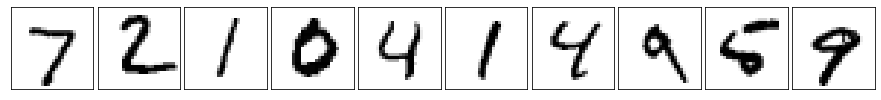

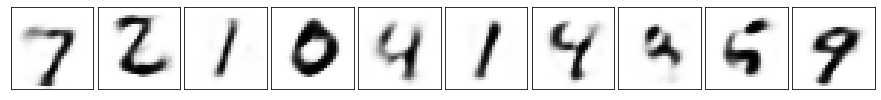

In [0]:
image_batch = autoencoder.predict(X_test[:10])

# set up the figure
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(10):
  ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i], 
            cmap=plt.cm.binary, interpolation='nearest')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(10):
  ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(image_batch[i],
            cmap=plt.cm.binary, interpolation='nearest')



---



In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [0]:
X_train = X_train.reshape([X_train.shape[0], X_train.shape[1] * X_train.shape[2]])
X_test = X_test.reshape([X_test.shape[0], X_test.shape[1] * X_test.shape[2]])

In [0]:
n_samples, n_features = X_train.shape
n_components = 20

pca = PCA(n_components=n_components)
pca.fit(X_train)

num_elements = X_test.shape[0]
X_test_PCA = pca.fit_transform(X_test)

X_reconstructed = pca.inverse_transform(X_test_PCA)

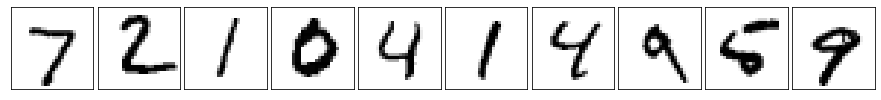

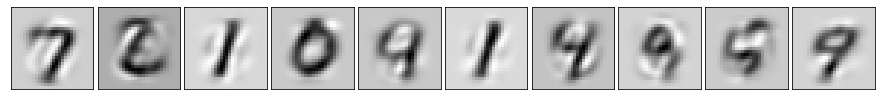

In [0]:
# set up the figure
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.reshape(X_test[i,:], (28,28)),
              cmap=plt.cm.binary, interpolation='nearest')

# set up the figure
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.reshape(X_reconstructed[i,:], (28,28)),
              cmap=plt.cm.binary, interpolation='nearest')

Text(0, 0.5, 'Autoencoder')

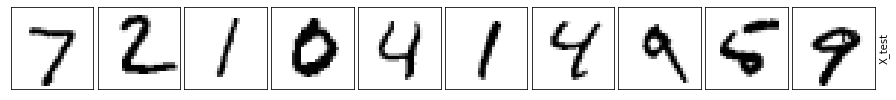

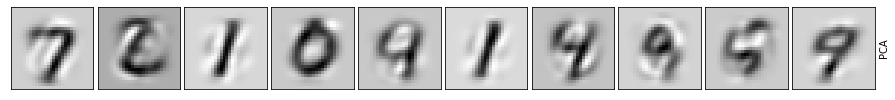

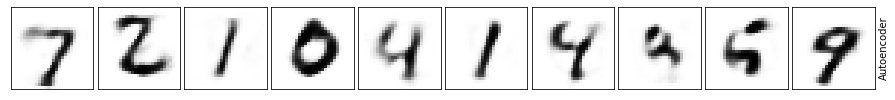

In [0]:
#Let's compare results from autoencoders, PCA and original images

# set up the figure
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.reshape(X_test[i,:], (28,28)),
              cmap=plt.cm.binary, interpolation='nearest')

ax.yaxis.set_label_position("right")
ax.set_ylabel('X_test', fontsize='medium',)

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.reshape(X_reconstructed[i,:], (28,28)),
              cmap=plt.cm.binary, interpolation='nearest')

ax.yaxis.set_label_position("right")
ax.set_ylabel('PCA', fontsize='medium',)

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(10):
  ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(image_batch[i],
            cmap=plt.cm.binary, interpolation='nearest')

ax.yaxis.set_label_position("right")
ax.set_ylabel('Autoencoder', fontsize='medium',)



---



---



In [0]:
# This figure shows that even the simple autoencoder with only a single hidden
# layer unit outperforms standard PCA algorithm.

# Let's build a more complex model

In [0]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class Encoder(Sequential):
  def __init__(self):
    super().__init__()

    self.add(Flatten(input_shape=(28, 28)))
    self.add(Dense(400, activation='relu'))
    self.add(Dense(200, activation='relu'))
    self.add(Dense(100, activation='relu'))
    self.add(Dense(50,  activation='relu'))
    self.add(Dense(25,  activation='relu'))

In [0]:
class Decoder(Sequential):
  def __init__(self):
    super().__init__()

    self.add(Dense(50,   activation='relu', input_shape=[25]))
    self.add(Dense(100,  activation='relu'))
    self.add(Dense(200,  activation='relu'))
    self.add(Dense(400,  activation='relu'))
    self.add(Dense(784,  activation='sigmoid'))
    self.add(Reshape([28, 28]))

In [0]:
encoder = Encoder()
decoder = Decoder()

In [0]:
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(loss= 'mean_squared_error',
                    optimizer= SGD(1.5),
                    metrics=['accuracy'])

In [0]:
autoencoder.fit(X_train, X_train,
                epochs= 5,
                validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0578 - accuracy: 0.0558 - val_loss: 0.0383 - val_accuracy: 0.0640
Epoch 2/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0326 - accuracy: 0.0803 - val_loss: 0.0282 - val_accuracy: 0.0825
Epoch 3/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0265 - accuracy: 0.0915 - val_loss: 0.0249 - val_accuracy: 0.0876
Epoch 4/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0247 - accuracy: 0.0961 - val_loss: 0.0236 - val_accuracy: 0.0969
Epoch 5/5
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0235 - accuracy: 0.0997 - val_loss: 0.0252 - val_accuracy: 0.1003


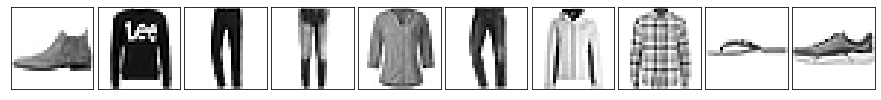

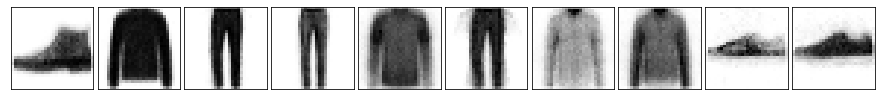

In [0]:
image_batch = autoencoder.predict(X_test[:10])

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(10):
  ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i], 
            cmap=plt.cm.binary, interpolation='nearest')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(10):
  ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(image_batch[i],
            cmap=plt.cm.binary, interpolation='nearest')

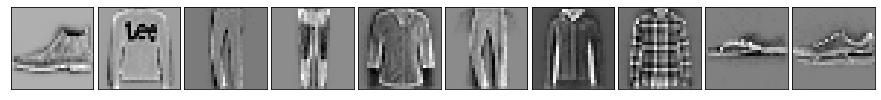

In [0]:
diff = image_batch - X_test[:10]

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(10):
  ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(diff[i],
            cmap=plt.cm.binary, interpolation='nearest')



---



In [0]:
# So, this was the first way to do this, also the easiest one.
# The other way to build a model is to use model subclassing with Keras.

In [0]:
from tensorflow.keras import Model

In [0]:
# Creating a model
class Encoder(Model):
  def __init__(self):
    super(Encoder, self).__init__()
    self.flatten = Flatten(input_shape=(28, 28))
    self.dense_1 = Dense(400, activation='relu')
    self.dense_2 = Dense(200, activation='relu')
    self.dense_3 = Dense(100, activation='relu')
    self.dense_4 = Dense(50,  activation='relu')
    self.dense_5 = Dense(25,  activation='relu')

  def call(self, x):
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.dense_2(x)
    x = self.dense_3(x)
    x = self.dense_4(x)
  
    return self.dense_5(x)

In [0]:
# Creating a model
class Decoder(Model):
  def __init__(self):
    super(Decoder, self).__init__()
    self.dense_1 = Dense(50,   activation='relu', input_shape=[25])
    self.dense_2 = Dense(100,  activation='relu')
    self.dense_3 = Dense(200,  activation='relu')
    self.dense_4 = Dense(400,  activation='relu')
    self.dense_5 = Dense(784,  activation='sigmoid')
    self.reshape = Reshape([28, 28])

  def call(self, x):
    x = self.dense_1(x)
    x = self.dense_2(x)
    x = self.dense_3(x)
    x = self.dense_4(x)
    x = self.dense_5(x)

    return self.reshape(x)

In [0]:
class Autoencoder(Model):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = Encoder()
    self.decoder = Decoder()
  
  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

In [0]:
# Create an instance of the model
autoencoder = Autoencoder()

In [0]:
autoencoder.compile(loss= 'binary_crossentropy',
                    optimizer= SGD(1.5),
                    metrics=['accuracy'])

In [35]:
autoencoder.fit(X_train, X_train,
                epochs= 5,
                validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2992 - accuracy: 0.5055 - val_loss: 0.2975 - val_accuracy: 0.5040
Epoch 2/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2967 - accuracy: 0.5059 - val_loss: 0.2992 - val_accuracy: 0.5026
Epoch 3/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2946 - accuracy: 0.5062 - val_loss: 0.2958 - val_accuracy: 0.5048
Epoch 4/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2930 - accuracy: 0.5064 - val_loss: 0.2930 - val_accuracy: 0.5048
Epoch 5/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2916 - accuracy: 0.5065 - val_loss: 0.2975 - val_accuracy: 0.5030
